In [1]:
#Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Definição dos Dados

# Valores do Circuito:
kb = 1.3806*(10**(-23)) # Constante de Boltzmann
T = 300 # Temperatura [K]
Vo = 10 # Voltagem inicial [V]
Io = 5 # Corrente inicial[A]


# Valores do circuito RC:
Rc1 = 50*(10**(3)) # Resistência [Ohm]
Rc2 = 500*(10**(3)) # Resistência [Ohm]
Rc3 = 1000*(10**(3)) # Resistência [Ohm]
C = 47*(10**(-6)) # Capacitância [F]
## Constantes de tempo RC:
tauc1 = Rc1*C
tauc2 = Rc2*C
tauc3 = Rc3*C
## Parâmetros do Processo RC:
Beta1 = np.sqrt((2*kb*T)/(Rc1*(C**2)))
Beta2 = np.sqrt((2*kb*T)/(Rc2*(C**2)))
Beta3 = np.sqrt((2*kb*T)/(Rc3*(C**2)))
## Valores de Tempo RC:
toc = 0 # Tempo Inicial [s]
tfc = 500 # Tempo Final [s]
Nc = 50000 # Número de passos [s]
dtc = float(tfc-toc)/Nc # Variação do Tempo [s]
tc = np.arange(toc, tfc, dtc) # Array da trajetória de Tempo

# Valores do circuito RL:
Rl1 = 50 # Resistência [Ohm]
Rl2 = 75 # Resistência [Ohm]
Rl3 = 100 # Resistência [Ohm]
L = 4.7 # Indutância [mH]
## Constantes de tempo RL:
taul1 = L/Rl1
taul2 = L/Rl2
taul3 = L/Rl3
## Parâmetros do Processo RL:
Alfa1 = np.sqrt((2*kb*T*Rl1)/((L**2)))
Alfa2 = np.sqrt((2*kb*T*Rl2)/((L**2)))
Alfa3 = np.sqrt((2*kb*T*Rl3)/((L**2)))
## Valores de Tempo RL:
tol = 0 # Tempo Inicial [s]
tfl = 1 # Tempo Final [s]
Nl = 50000 # Número de passos [s]
dtl = float(tfl-tol)/Nl # Variação do Tempo [s]
tl = np.arange(tol, tfl, dtl) # Array da trajetória de Tempo


# Processo de Wiener:
dw = np.random.normal(loc = 0, scale = np.sqrt(dtc), size = tc.size)



In [4]:
len(dw)

50000

In [5]:
Beta1

8.660175628670619e-09

In [8]:
(-1/(Rc1*C))*dtc

-0.004255319148936171

In [122]:
# Para o circuito RC
# Ornstein-Uhlenbeck
# dV = (-1/RC)Vdt + BetadW
# Euler-Maruyama
# X(t+1) = X(t) + a(Xn, tn)*Delta_t + b(Xn, tn)*Delta_W
# Onde a = (-1/RC)V e b = Beta
X1 = np.zeros(tc.size)
X1[0] = Vo
X2 = np.zeros(tc.size)
X2[0] = Vo
X3 = np.zeros(tc.size)
X3[0] = Vo

for i in range(1, tc.size):
    X1[i] = X1[i-1] + (X1[i-1]*(-1/(Rc1*C))*dtc) + (Beta1*dw[i])
    X2[i] = X2[i-1] + (X2[i-1]*(-1/(Rc2*C))*dtc) + (Beta2*dw[i])
    X3[i] = X3[i-1] + (X3[i-1]*(-1/(Rc3*C))*dtc) + (Beta3*dw[i])


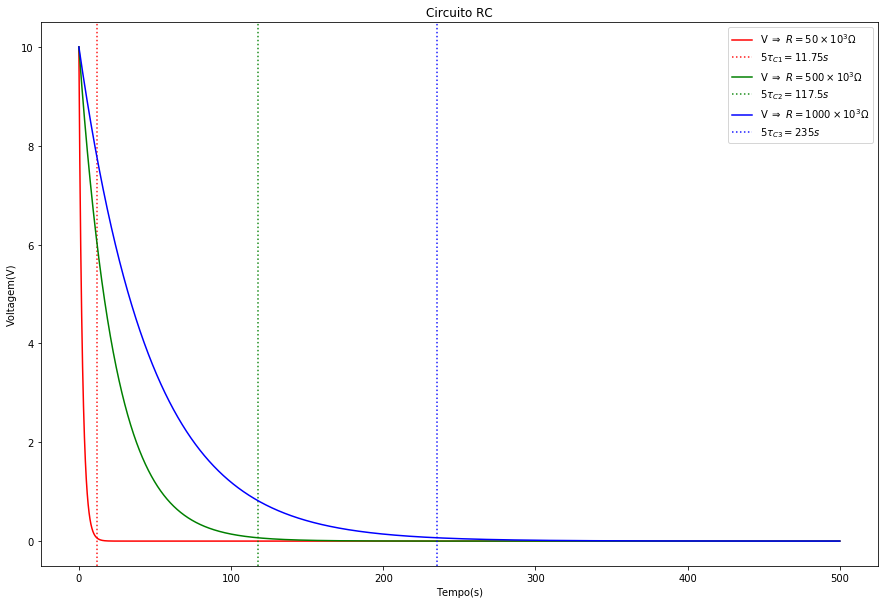

In [127]:
# Plot do gráfico RC
def plot_RC(X1,X2,X3,tc):
    fig, ax = plt.subplots(figsize=(15,10))
    plt.title("Circuito RC")
    plt.xlabel('Tempo(s)')
    plt.ylabel('Voltagem(V)') 
    plt.plot(tc, X1,  label = r"V $\Rightarrow$ $R = 50 \times 10^{3} \Omega $", color = "r")
    ax.axvline(x=5*tauc1, alpha=0.9, linestyle=':', color = "r", label=r'$5 \tau _{C1} = 11.75s$')
    plt.plot(tc, X2,  label = r"V $\Rightarrow$ $R = 500 \times 10^{3} \Omega $", color = "g")
    ax.axvline(x=5*tauc2, alpha=0.9, linestyle=':', color = "g", label = r"$5 \tau _{C2} = 117.5s$")
    plt.plot(tc, X3,  label = r"V $\Rightarrow$ $R = 1000 \times 10^{3} \Omega $", color = "b")
    ax.axvline(x=5*tauc3, alpha=0.9, linestyle=':', color = "b", label = r"$5 \tau _{C3} = 235s$")
    plt.legend()
    plt.savefig('CircRC.png')
plot_RC(X1,X2,X3,tc)

In [123]:
# Para o circuito RL
# Ornstein-Uhlenbeck
# dV = (V - RI)*(1/L)dt + AlfadW
# Euler-Maruyama
# Y(t+1) = Y(t) + a(Xn, tn)*Delta_t + b(Xn, tn)*Delta_W
# Onde a = (V - RI)*(1/L) e b = Alfa

Y1 = np.zeros(tl.size)
Y1[0] = Io
Y2 = np.zeros(tl.size)
Y2[0] = Io
Y3 = np.zeros(tl.size)
Y3[0] = Io

for j in range(1, tl.size):
    Y1[j] = Y1[j-1] + (((X1[j-1])-(Y1[j-1]*Rl1))*(1/L)*dtl) + (Alfa1*dw[j])
    Y2[j] = Y2[j-1] + (((X2[j-1])-(Y2[j-1]*Rl2))*(1/L)*dtl) + (Alfa2*dw[j])
    Y3[j] = Y3[j-1] + (((X3[j-1])-(Y3[j-1]*Rl3))*(1/L)*dtl) + (Alfa3*dw[j])



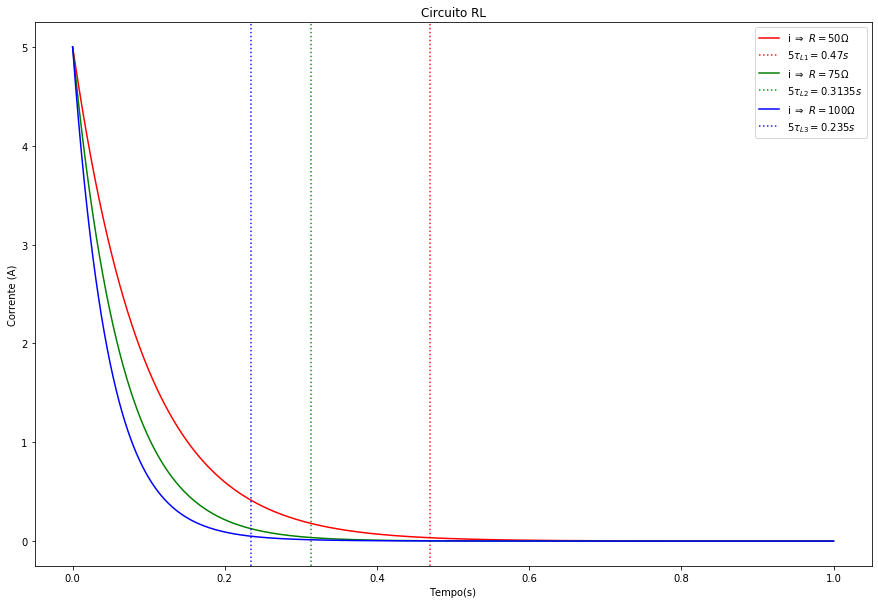

In [128]:
# Plot do gráfico RL
def plot_RL(Y1,Y2,Y3,tl):
    fig, ax = plt.subplots(figsize=(15,10))
    plt.title("Circuito RL")
    plt.xlabel('Tempo(s)')
    plt.ylabel('Corrente (A)') 
    plt.plot(tl, Y1, label = r"i $\Rightarrow$ $R = 50 \Omega$", color = "r")
    ax.axvline(x=5*taul1, alpha=0.9, linestyle=':', color = "r", label=r'$5 \tau _{L1} = 0.47s$')
    plt.plot(tl, Y2, label = r"i $\Rightarrow$ $R = 75 \Omega$", color = "g")
    ax.axvline(x=5*taul2, alpha=0.9, linestyle=':', color = "g", label=r'$5 \tau _{L2} = 0.3135s$')
    plt.plot(tl, Y3, label = r"i $\Rightarrow$ $R = 100 \Omega$", color = "b")
    ax.axvline(x=5*taul3, alpha=0.9, linestyle=':', color = "b", label=r'$5 \tau _{L3} = 0.235s$')
    plt.legend()
    plt.savefig('CircRL.png')
plot_RL(Y1,Y2,Y3,tl)